# Выпускной проект. Банки — Сегментация пользователей по потреблению.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Проверка-статистических-гипотез" data-toc-modified-id="Проверка-статистических-гипотез-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проверка статистических гипотез</a></span></li><li><span><a href="#Промежуточный-итог" data-toc-modified-id="Промежуточный-итог-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Промежуточный итог</a></span></li><li><span><a href="#Сегментация-пользователей" data-toc-modified-id="Сегментация-пользователей-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Сегментация пользователей</a></span></li><li><span><a href="#Выводы-и-рекомендации" data-toc-modified-id="Выводы-и-рекомендации-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы и рекомендации</a></span></li></ul></div>

Презентация:<https://disk.yandex.ru/i/RNQAU5ca-inzQg>

**Цель:** Выделить сегменты отточных клиентов банка для отдела маркетинга. Результаты будут использованы при проведении маркетингивых кампаний.

**Задача:** Проанализировать клиентов банка и сегментировать пользователей по количеству потребляемых продуктов, обращая особое внимание на отток. Сегменты должны быть однородными, высокоотточными и покрывать максимум проблемных зон банка.

**Описание данных:** Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

**Состав данных**:
- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `city` — город,
- `gender` — пол,
- `age` — возраст,
- `equity` — приблизительная оценка собственности клиента,
- `balance` — баланс на счёте,
- `products` — количество продуктов, которыми пользуется клиент,
- `credit_card` — есть ли кредитная карта,
- `last_activity` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `churn` — ушёл = 1 или нет = 0.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

## Предобработка данных

- Загрузка и обзор данных

In [2]:
data_raw = pd.read_csv('/datasets/bank_scrooge.csv')
data_raw

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


In [3]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Всего в датасете 10000 строк. Видно наличие пропусков в данных о возрасте и балансе.

- Переименование колонок

Приведем наименование столбцов к "змеиному" формату для удобства в работе

In [4]:
data_raw = data_raw.rename(columns = {'USERID':'user_id', 'EST_SALARY':'est_salary'})

- Исследование пропущенных значений

In [5]:
data_raw.query('age.isna()')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.0,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
2165,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2444,221156,913.0,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0
3091,138660,836.0,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
4912,210674,834.0,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0
5470,218868,827.0,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0
5495,151662,884.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0
7236,210135,908.0,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0
7248,219343,920.0,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0
7345,184913,829.0,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0


Пропусков в данных возраста мало, также визуально видно, что среди этих пользователей только 1 отточный, остальные активные. Поскольку всетаки нас больше интересуют отточные клиенты удаление данных строк не сильно повлияет на ход исследования.

In [6]:
data = data_raw.dropna(subset = ['age'])

In [7]:
round(data.query('balance.isna() and products == 1 and credit_card == 1').shape[0]/data.query('balance.isna()').shape[0]*100, 2)

69.55

Среди пользователей, у которых отсутствуют данные о балансе около 70% состовляют клиенты с 1 продуктом кредитная карта. В связи с этим можно предположить, что пропуски баланса могут означать, что, например, у клиента отрицательный кредитный баланс.  Пропусков в данных о балансе довольно много, заполнить их не представляется возможным, так как заполнение средним или медианой может исказить данные анализа

- Соответствие типов данных

In [8]:
data['score'] = data['score'].astype('int')
data['age'] = data['age'].astype('int')

/tmp/ipykernel_48/4293456660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['score'] = data['score'].astype('int')
/tmp/ipykernel_48/4293456660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'] = data['age'].astype('int')


- Исследование дубликатов

In [9]:
print(f'Проверка на явные дубликаты. Обнаружено явных дубликатов - {data.duplicated().sum()}')

Проверка на явные дубликаты. Обнаружено явных дубликатов - 0


In [10]:
print(f'Проверка на неявные дубликаты. Обнаружено неявных дубликатов - {data["user_id"].duplicated().sum()}')

Проверка на неявные дубликаты. Обнаружено неявных дубликатов - 50


In [11]:
users = data[data["user_id"].duplicated()]["user_id"]
data.query('user_id.isin(@users)').sort_values(by = 'user_id').head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883,Рыбинск,Ж,55,1,362756.49,3,0,1,175920.48,1
7694,116540,887,Ярославль,Ж,38,0,NaN,1,0,1,119247.61,0
4866,117943,855,Рыбинск,Ж,32,6,1036832.93,4,1,1,107792.71,1
7542,117943,880,Ярославль,Ж,40,0,NaN,1,1,0,137718.93,0
5863,120258,908,Рыбинск,Ж,38,4,2213581.63,2,0,1,160327.77,1
5896,120258,905,Ярославль,М,30,0,NaN,1,1,1,146427.96,0
1411,123461,829,Ярославль,Ж,59,0,96222.44,2,0,1,102771.55,1
8638,123461,934,Рыбинск,М,34,0,NaN,2,1,0,291619.27,0
9775,124450,758,Рыбинск,Ж,36,0,73574.07,2,0,1,79963.59,0
8164,124450,859,Ярославль,Ж,38,6,516811.20,1,1,1,95144.63,1


Визуально видно, что при одном и том же user_id клиенты разные, но один активных, а другой отточный из чего можно сделать вывод, что после ухода клиента их user_id присваивается новым клиентам.

Признать дубликатами эти строки нельзя, удалению не подлежат.

- Исследование на наличие выбросов

In [12]:
round(data[['score', 'age', 'equity', 'balance', 'products', 'est_salary']].describe(), 2)

,score,age,equity,balance,products,est_salary
count,9974.00,9974.00,9974.00,7.695000e+03,9974.00,9974.00
mean,848.68,42.73,2.63,8.272456e+05,1.87,147786.81
std,65.40,12.18,1.98,1.980327e+06,0.79,139285.51
min,642.00,18.00,0.00,0.000000e+00,0.00,2546.30
25%,802.00,33.00,0.00,2.956987e+05,1.00,75251.66
50%,853.00,40.00,3.00,5.242953e+05,2.00,119626.80
75%,900.00,51.00,4.00,9.800512e+05,2.00,174499.81
max,1000.00,86.00,9.00,1.191136e+08,5.00,1395064.45


По числовым характеристикам видно, что столбцы `age`, `balance`, `est_salary` требуют дополнительной проверки на выбросы.

В столбце `products` минимальное значение - 0, это также требует проверки.

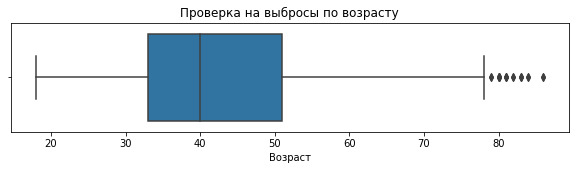

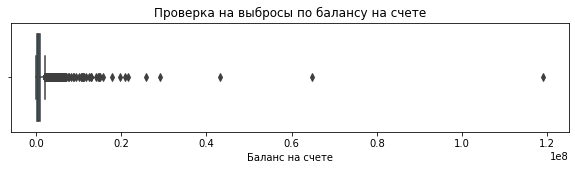

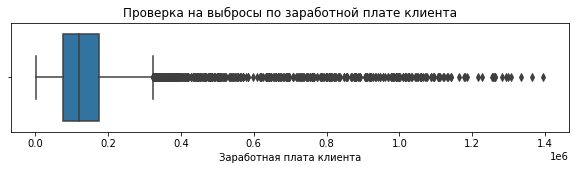

In [13]:
plt.figure(figsize=(10, 2))
sns.boxplot(data = data, x = 'age')
plt.title('Проверка на выбросы по возрасту')
plt.xlabel('Возраст')
plt.show()

plt.figure(figsize=(10, 2))
sns.boxplot(data = data, x = 'balance')
plt.title('Проверка на выбросы по балансу на счете')
plt.xlabel('Баланс на счете')
plt.show()

plt.figure(figsize=(10, 2))
sns.boxplot(data = data, x = 'est_salary')
plt.title('Проверка на выбросы по заработной плате клиента')
plt.xlabel('Заработная плата клиента')
plt.show()

Рассмотрим выбросы визуально.

In [14]:
data.sort_values(by = 'age', ascending = False).head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
9176,116838,777,Ярославль,Ж,86,3,772929.83,1,1,1,40877.18,0
9413,135210,921,Ярославль,Ж,86,0,NaN,1,0,1,36185.91,0
9423,159150,872,Рыбинск,Ж,84,3,418462.51,1,1,1,34945.79,0
3272,207759,888,Ярославль,Ж,84,3,1287558.90,2,0,1,97982.17,0
9442,196479,872,Ростов,Ж,83,4,546313.32,1,1,1,91801.67,0
2795,214518,820,Ярославль,Ж,83,3,1137456.03,3,0,0,18037.97,0
1621,151166,916,Рыбинск,Ж,83,0,NaN,1,1,1,55681.82,0
1987,219132,827,Рыбинск,Ж,82,3,275391.31,2,0,0,59205.90,0
8237,208065,785,Рыбинск,Ж,82,2,1221645.78,3,1,1,66059.88,0
5602,151854,707,Ярославль,Ж,81,0,NaN,1,1,0,102360.77,0


У клиентов старше 80 лет в большинстве есть положительные баланс на счета, они активные, не отточные имеют доход и имущество. Таких клиентов мало, скорее всего, просто потому что доля людей такого возраста в целом меньше. Удалять не будем 

In [15]:
data.sort_values(by = 'balance', ascending = False).head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7597,156149,900,Ярославль,М,62,5,1.191136e+08,2,1,1,138041.31,0
1059,114103,894,Ярославль,М,58,4,6.486621e+07,2,1,1,88861.60,1
1846,114088,927,Ярославль,М,57,5,4.327710e+07,3,0,1,82619.00,0
4721,228786,1000,Ярославль,М,45,5,2.900893e+07,2,0,1,811804.54,0
9753,122015,885,Ярославль,М,64,4,2.572776e+07,3,1,0,168746.90,0
8484,221720,1000,Ярославль,Ж,35,5,2.154994e+07,2,0,0,1051902.65,0
6948,137434,1000,Ярославль,М,37,4,2.090616e+07,2,1,1,947606.60,1
125,227092,1000,Ярославль,М,32,5,1.975718e+07,2,1,1,1024626.50,0
7109,203824,986,Ярославль,М,34,5,1.790476e+07,2,1,1,856500.86,1
4005,163640,912,Ярославль,М,35,4,1.562410e+07,2,0,1,1395064.45,0


Высокий баланс - это хорошо, у данных клиентов 2 и более продуктов банка, есть доход и все они имеют оценку имущества 4 и более.
К сожалению, среди них есть отточные. Выбросами их нельзя считать.

In [16]:
data.sort_values(by = 'est_salary', ascending = False).head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4005,163640,912,Ярославль,М,35,4,15624095.80,2,0,1,1395064.45,0
4637,149430,961,Ярославль,М,37,5,4054667.81,3,0,0,1363549.52,0
4473,216422,956,Ярославль,М,27,0,NaN,1,1,0,1333687.36,0
1600,197637,785,Ярославль,М,41,0,NaN,1,1,0,1307090.18,0
5160,174746,731,Ярославль,Ж,30,0,NaN,2,1,0,1296838.08,0
149,218801,958,Ярославль,М,34,0,NaN,1,1,0,1292825.74,0
8147,135243,951,Ярославль,М,38,5,14134432.03,2,1,0,1281547.73,0
9103,123965,939,Ярославль,М,34,5,9346657.08,1,1,1,1263028.49,1
9711,193979,754,Ярославль,Ж,53,0,NaN,1,1,0,1261408.41,0
1468,162749,940,Ярославль,М,32,2,4508306.65,2,1,0,1260919.56,0


В данном случае сложно визуально оценить являются данные о заработной плате выбросами или аномалиями. у клиентов не выражено каких-то общих закономерностей. Однако такх значений много и если удалить их мы потеряем много других данных. 

In [17]:
data['products'].unique()

array([2, 3, 1, 4, 5, 0])

In [18]:
data.query('products == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962,Рыбинск,Ж,79,3,NaN,0,0,0,25063.96,1


Найдена 1 строка, где количество продуктов = 0, клиент уже выбыл, данные о балансе отсутствуют, удалим стоку.

In [19]:
data = data.query('products > 0')

In [20]:
print(f"Из датасета удалено {round((1-len(data['user_id'])/len(data_raw['user_id']))*100, 2)}% данных")

Из датасета удалено 0.27% данных


Проверяем корректность внесенных изменений

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9973 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9973 non-null   int64  
 1   score          9973 non-null   int64  
 2   city           9973 non-null   object 
 3   gender         9973 non-null   object 
 4   age            9973 non-null   int64  
 5   equity         9973 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9973 non-null   int64  
 8   credit_card    9973 non-null   int64  
 9   last_activity  9973 non-null   int64  
 10  est_salary     9973 non-null   float64
 11  churn          9973 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 1012.9+ KB


## Исследовательский анализ данных

- Выявим признаки типичных клиентов, исследование распределения клиентов по возрасту, полу, местонахождению, оценке собственности и кредитному скорингу

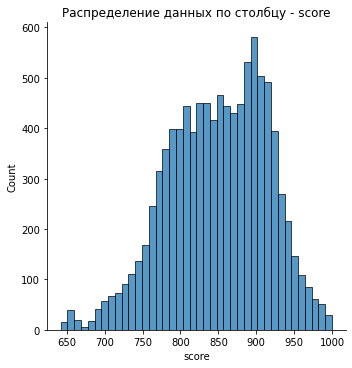

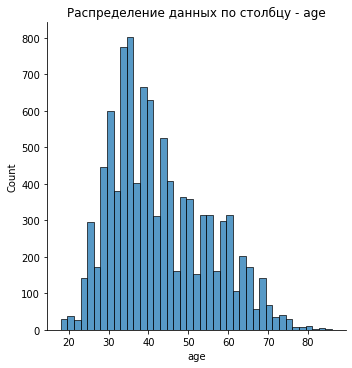

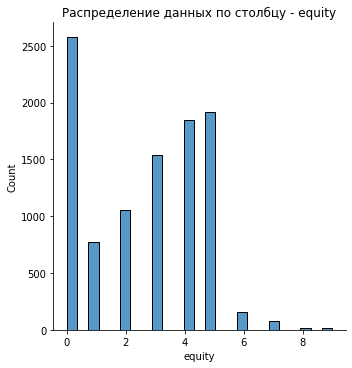

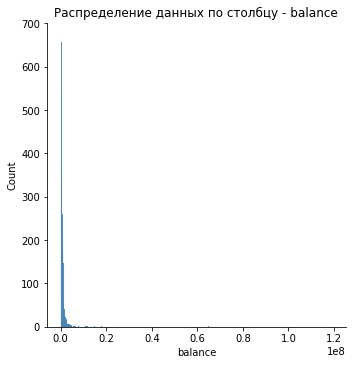

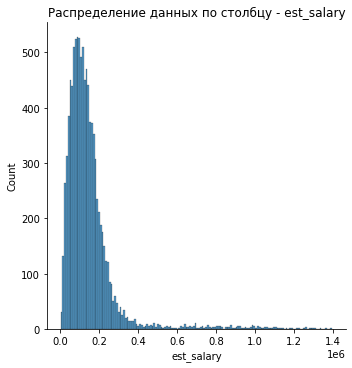

In [22]:
for i in ['score', 'age', 'equity', 'balance', 'est_salary']:
    sns.displot(data[i])
    plt.title(f'Распределение данных по столбцу - {i}')
    plt.show()

По графикам распределения можно сделать следующие выводы:

- `score` - больше всего пользователей имеют оценку скоринга в диапазоне от 780 до 950, распределение плавное, близко к нормальному, наибольший пик на оценке 900.
- `age` - больше всего клиентов в возрасто от 30 до 45 лет, в половину меньше в возрасте от 45 до 60, далее количетво клиентов убывает, в возрасте до 30 клиентов также не много.
- `equity` - больше всего клиентов с оценкой собственности 0, с оценкой от 1 до 5 видно увеличение количества клиентов, клиентов с оценкой 4-5 тоже много, клиентов с оценкой от 6 до 9 очень мало, это скорее редкость.
- `balance` - распределение по даным баланка необходимо посторить отдельно с ограничением по оси х, так как из-за клентов очень высоким балансом, график не читаем
- `est_salary` - больше всего клиентов с зарплатой до 250000, далее график плавно снижается.

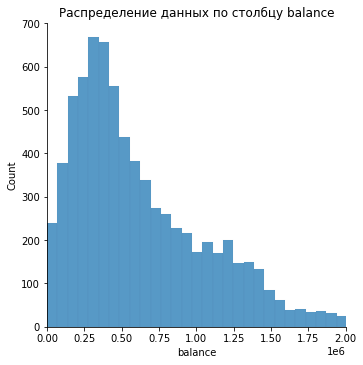

In [23]:
sns.displot(data['balance'])
plt.title(f'Распределение данных по столбцу balance')
plt.xlim(0, 2000000)
plt.show()

По графику распределения баланса при ограничении 2млн. можно увидеть 1 пиковое значение, большинство клиентов имеют баланс в диапазоне от 250000 до 500000, далее график плавно снижается и явновыраженных пиков не имеет, также есть клиенты с нулевым балансом

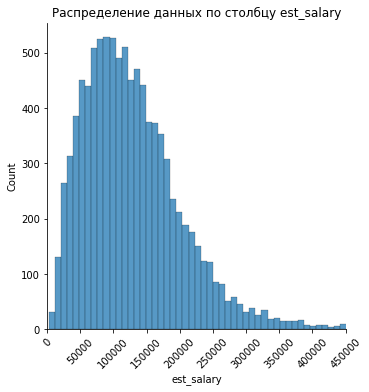

In [24]:
sns.displot(data['est_salary'])
plt.title(f'Распределение данных по столбцу est_salary')
plt.xlim(0, 450000)
plt.xticks(rotation=45)
plt.show()

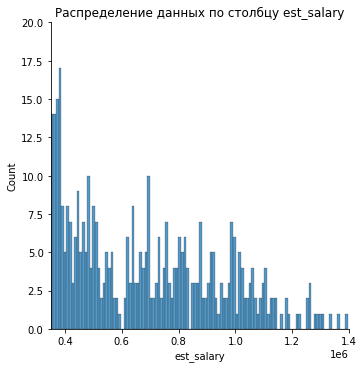

In [25]:
sns.displot(data['est_salary'])
plt.title(f'Распределение данных по столбцу est_salary')
plt.xlim(350000, 1400000)
plt.ylim(0, 20)
plt.show()

При детальном рассмотрении распределения клиентов по признаку заработной платы можно сделать вывод, что больше всего клиентов с заабоной платой от 50000 до 200000, далее график плавно снижается

Рассмотрим как распределяются клиенты банка по другим признакам

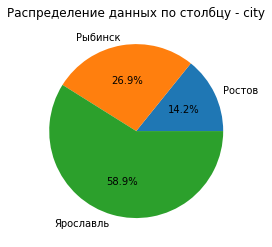

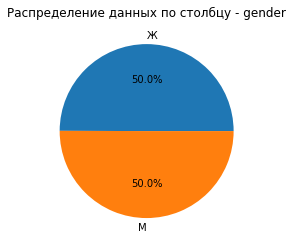

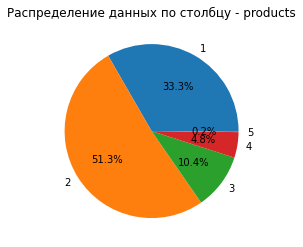

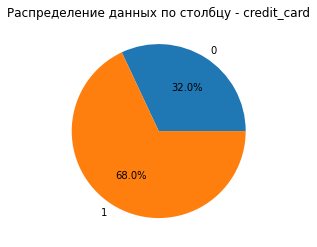

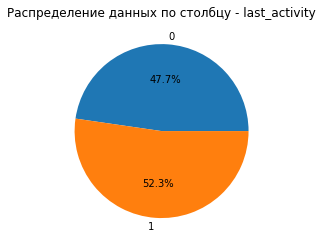

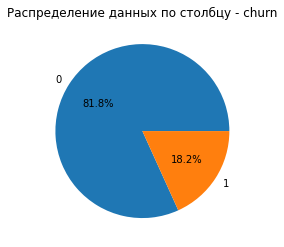

In [26]:
for i in ['city', 'gender', 'products', 'credit_card', 'last_activity', 'churn']:
    data_i = data.groupby(i).agg({'user_id': 'count'})
    plt.pie(data_i['user_id'], labels=data_i.index, autopct='%1.1f%%')
    plt.title(f'Распределение данных по столбцу - {i}')
    plt.show()

- Более половины клиентов проживают в Ярославле, это логично, город больше по численности и является областным центром.
- Интересно, что по гендерному признаку клиенты делятся поровну
- Треть клиентов имеют 1 продукт, чуть больше половины пользуются 2 продуктами банками, у остальных 3 и более продукта
- около трети клиентов не кредитуются в нашем банке, две трети клиентов имеют кредитную карту
- примерно поровну делятся клиенты выполняющие активные действия и невыполняющие, активных чуть больше
- отточных клиентов 18,2%, остальные клиенты - активные.

Уходят менее 20% клиентов. Необходимо проверить какие именно клиенты чаще уходят.

Портрет среднестатистического клиента банка:
- Половина клиентов проживают в Ярославле
- больше всего клиентов в возрасте от 30 до 45 лет и от 45 до 60 лет
- больше всего клиентов с оценкой собственности 0, клиентов с оценкой 4-5 тоже много
- больше всего клиентов с зарплатой до 250000
- большинство используют 1 или 2 продукта

- Сравним уровни оттока (доли отточных клиентов) по категориям, определить наиболее отточные категории клиентов

Сравним средние и медианные значения числовых показателей с разбивкой по количеству продуктов

In [27]:
(round(data
       .groupby('products')
       .agg({'churn':'mean', 'user_id':'count', 'score':['mean', 'median'],\
             'age':['mean', 'median'], 'equity':['mean', 'median'], \
             'balance':['mean', 'median'], 'est_salary':['mean', 'median']}), 2))

churn user_id   score           age        equity            balance  \
          mean   count    mean median   mean median   mean median        mean   
products                                                                        
1         0.07    3323  854.30    883  42.20     40   1.33      0   611006.20   
2         0.19    5119  844.56    844  42.77     40   3.15      3   812152.00   
3         0.29    1038  837.24    828  45.71     42   3.52      4   993888.30   
4         0.63     474  878.27    874  39.78     38   4.15      4  1267820.57   
5         0.42      19  859.26    851  36.47     37   3.68      4   610986.63   

                    est_salary             
             median       mean     median  
products                                   
1         415369.49  180605.23  142163.00  
2         515461.00  130400.38  109508.21  
3         665382.31  128697.01  105655.98  
4         939342.90  148788.95  122472.51  
5         282262.33  116652.05  106033.79

Поскольку клиентов, которые используют 3, 4 или 5 продуктов мало, выделим их в отдельную группу.

Клиенты использующие 1 продукт чаще имеют оценку собственности 0 (точно половина, т.к. мелиана равна 0). В целом средние и медианные показатели клиентов использующих разное количество продуктов сильно не отличаются. 

Сравним средние и медианные значения числовых показателей активных и отточных клиентов 

In [28]:
(round(data
       .groupby('churn')
       .agg({'user_id':'count', 'score':['mean', 'median'],\
             'age':['mean', 'median'], 'equity':['mean', 'median'], \
             'balance':['mean', 'median'], 'products':['mean', 'median'], 'est_salary':['mean', 'median']}), 2))

user_id   score           age        equity            balance  \
        count    mean median   mean median   mean median        mean   
churn                                                                  
0        8155  845.40    848  43.02     40   2.38      3   733031.63   
1        1818  863.36    866  41.43     39   3.76      4  1134458.21   

                 products        est_salary             
          median     mean median       mean     median  
churn                                                   
0      475410.09     1.76      2  147674.64  118227.60  
1      783908.90     2.38      2  148357.48  125408.88

У отточных клиентов выше средний и медианный баланс, среднее количество продуктов немного превышает у этот показатель активных клиентов, также отточные клиенты имеют более высокий средний показатель оценки собственности.

In [29]:
def products_group(products):
    """
    Возвращает группу клиентов по значению количества используемых продуктов, используя правила:
    - '1', если products = 1т;
    - '2', если products = 2;
    - '3 и более' если products >= 3.
    """
    
    if products == 1:
        return '1'
    if products == 2:
        return '2'
    return '3 и более' 

In [30]:
data['products_group'] = data['products'].apply(products_group)

 Сравним активных и отточных клиентов, это поможет сгруппировать пользователей и определить наиболлее отточные сегменты

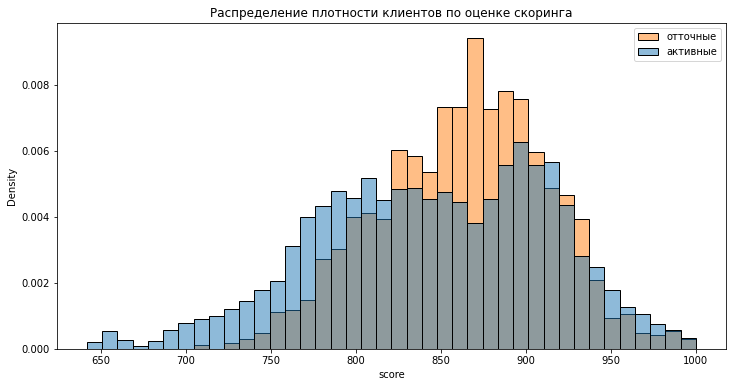

In [31]:
plt.figure(figsize=(12, 6))
sns.histplot(data = data, x= 'score', hue = 'churn', stat = 'density', common_norm = False)
plt.title('Распределение плотности клиентов по оценке скоринга')
plt.legend(['отточные', 'активные']);

На графике видно, что более отточные клиенты с оценкой скоринга от 820 до 910, сгруппируем пользователей в соответствии с этими показателями

In [32]:
def score_group(score):
    """
    Возвращает клентскую группу по значению оценки скоринга, используя правила:
    - 'менее 820', если score < 820;
    - 'от 820 до 910', если score <= 910;
    - 'более 910', если score > 910.
    """
    
    if score < 820:
        return 'менее 820'
    if score <= 910:
        return 'от 820 до 910'
    return 'более 910' 

In [33]:
data['score_group'] = data['score'].apply(score_group)

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера:</b> Отличное решение!
</div>

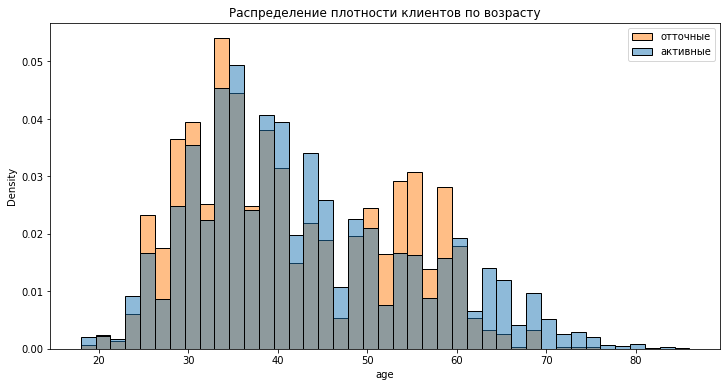

In [34]:
plt.figure(figsize=(12, 6))
sns.histplot(data = data, x= 'age', hue = 'churn', stat = 'density', common_norm = False)
plt.title('Распределение плотности клиентов по возрасту')
plt.legend(['отточные', 'активные']);

На графике видно, что наиболее отточные возрастные группы клиентов - от 25 до 35 лет и от 50 до 60 лет.

In [35]:
def age_group(age):
    """
    Возвращает возрастную группу по значению возраста age, используя правила:
    - '24 и менее', если age < 25 лет;
    - '25-35', если age от 25 до 35;
    - '36-49', если age от 36 до 49;
    - '50-60', если age от 50 до 60;
    - '60 и более' — от 60 и старше.
    """
    
    if age < 25:
        return '24 и менее'
    if age <= 35:
        return '25-35'
    if age < 50:
        return '36-49'
    if age <= 60:
        return '50-60'
    return '60 и более' 

In [36]:
data['age_group'] = data['age'].apply(age_group)

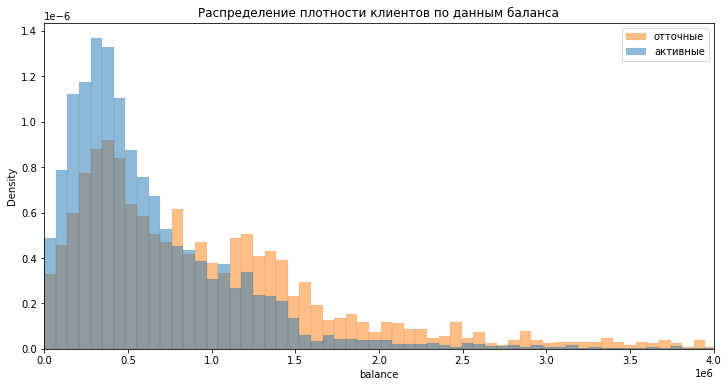

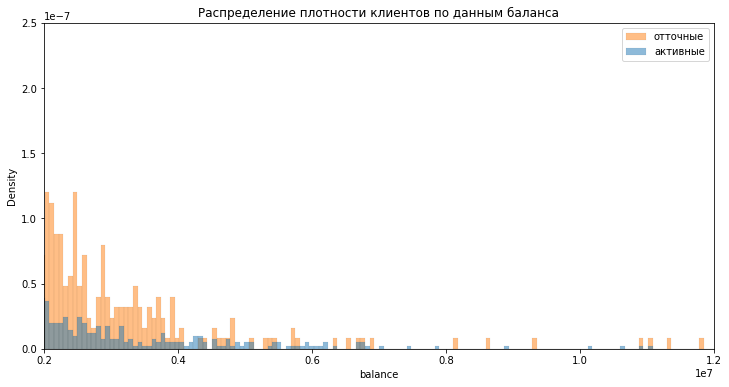

In [37]:
plt.figure(figsize=(12, 6))
sns.histplot(data = data, x= 'balance', hue = 'churn', stat = 'density', common_norm = False)
plt.xlim(0, 4000000)
plt.title('Распределение плотности клиентов по данным баланса')
plt.legend(['отточные', 'активные']);

plt.figure(figsize=(12, 6))
sns.histplot(data = data, x= 'balance', hue = 'churn', stat = 'density', common_norm = False)
plt.xlim(2000000, 12000000)
plt.ylim(0, 0.00000025)
plt.title('Распределение плотности клиентов по данным баланса')
plt.legend(['отточные', 'активные']);

На графиках видно, что клиенты с балансом более 800000 наиболее отточные. Так же на графике видно, что клиентов с балансом более 4млн. мало выделим их в отдельную группу

In [38]:
def balance_group(balance):
    """
    Возвращает клиентскую группу группу по значению баланса, используя правила:
    - 'низкий', если  balance <= 800000;
    - 'средний', если balance <= 2500000;
    - 'высокий', если balance <= 4000000;
    - 'сверхвысокий' — более 4000000;
    - 'не определено' - для пропусков.
    """
    
    if balance <= 800000:
        return 'низкий'
    if balance <= 2500000:
        return 'средний'
    if balance < 4000000:
        return 'высокий'
    if balance > 4000000:
        return 'сверхвысокий'
    return 'не определено' 

In [39]:
data['balance_group'] = data['balance'].apply(balance_group)

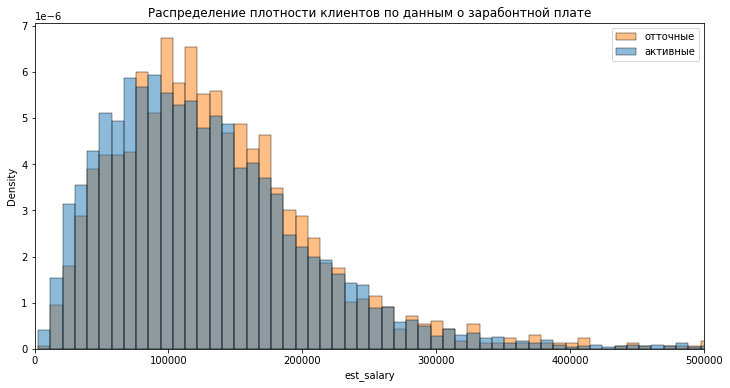

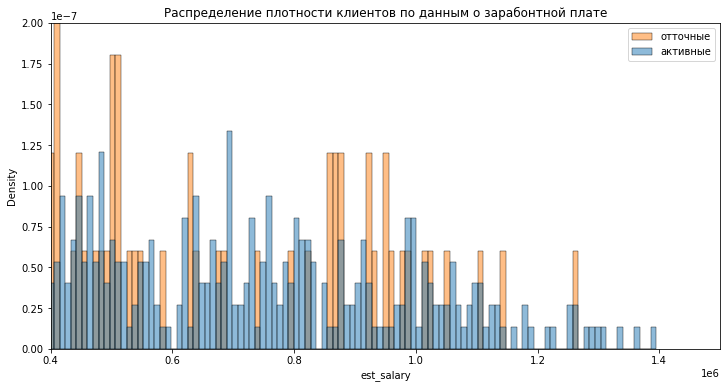

In [40]:
plt.figure(figsize=(12, 6))
sns.histplot(data = data, x= 'est_salary', hue = 'churn', stat = 'density', common_norm = False)
plt.xlim(0, 500000)
plt.title('Распределение плотности клиентов по данным о зарабонтной плате')
plt.legend(['отточные', 'активные']);

plt.figure(figsize=(12, 6))
sns.histplot(data = data, x= 'est_salary', hue = 'churn', stat = 'density', common_norm = False)
plt.xlim(400000, 1500000)
plt.ylim(0, 0.0000002)
plt.title('Распределение плотности клиентов по данным о зарабонтной плате')
plt.legend(['отточные', 'активные']);

Более активные клиенты с заработной платой до 100000, наиболее отточная группа клиентов с заработной платой от 100000 до 200000

In [41]:
def est_salary_group(est_salary):
    """
    Возвращает клиентскую группу по значению заработной платы, используя правила:
    - 'низкий', если est_salary <= 100000;
    - 'средний', если est_salary <= 200000;
    - 'высокий', если est_salary <= 400000;
    - 'сверхвысокий' — более 400000.
    """
    
    if est_salary <= 100000:
        return 'низкий'
    if est_salary <= 200000:
        return 'средний'
    if est_salary <= 400000:
        return 'высокий'
    return 'сверхвысокий' 

In [42]:
data['est_salary_group'] = data['est_salary'].apply(est_salary_group)

Проверим корректность добавления новых столбцов группировки.

In [43]:
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,products_group,score_group,age_group,balance_group,est_salary_group
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,2,от 820 до 910,25-35,низкий,низкий
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,3 и более,от 820 до 910,36-49,средний,низкий
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,1,от 820 до 910,25-35,не определено,средний
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,2,от 820 до 910,50-60,средний,средний
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,1,менее 820,25-35,низкий,низкий


Так же визуально посмотри как делятся отточные и активные клиенты по категориальным параметрам

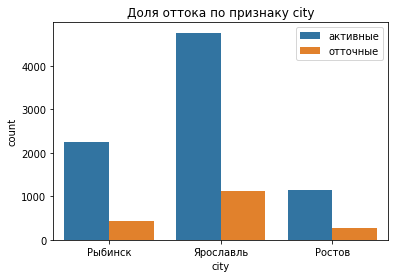

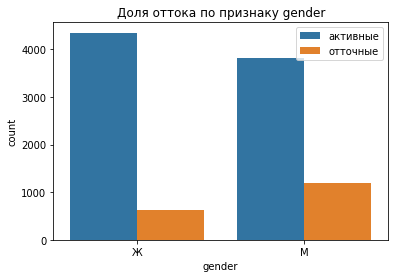

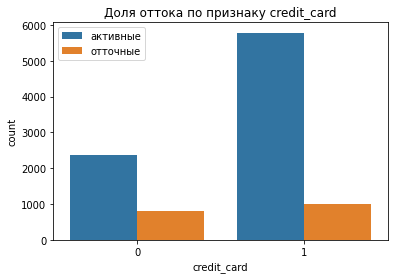

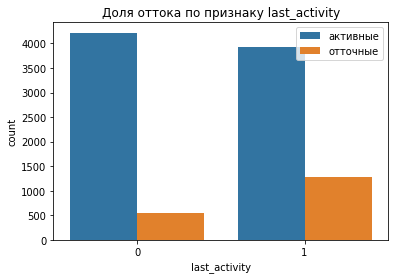

In [44]:
for i in ['city','gender','credit_card','last_activity']:
    sns.countplot(data=data, x=i, hue='churn');
    plt.title(f'Доля оттока по признаку {i}')
    plt.legend(['активные', 'отточные'])
    plt.show()        

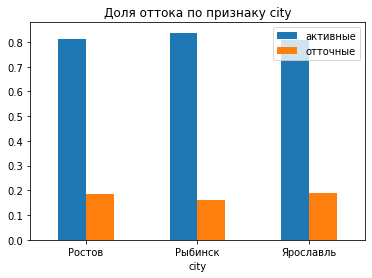

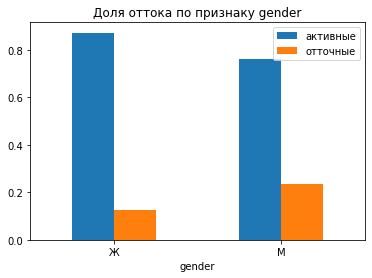

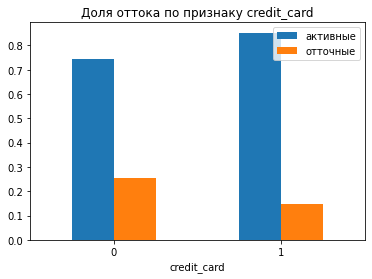

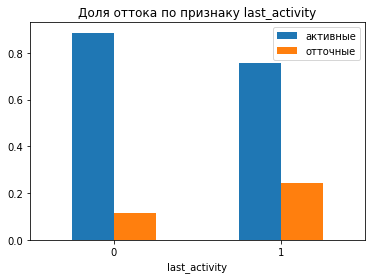

In [45]:
for i in ['city','gender','credit_card','last_activity']:
    data_i = pd.crosstab(index = data[i], columns = data['churn'], normalize = 'index')
    data_i.plot.bar(rot = 0);
    plt.title(f'Доля оттока по признаку {i}')
    plt.legend(['активные', 'отточные'])
    plt.show()    

При анализе относительных значений видно, что доля оттока по городам мало отличается, доля оттока среди мужчич выше, чем у женщин, также доля оттока выше среди клиентов не имеющих кредитную карту и совершающих активные действия

По графикам можно сделать следующие выводы:
- наиболее отточные клиенты имеют оценку скоринга в диапазоне от 820 до 910
- можно выделить 2 возрастные группы более отточных клиентов - от 25 до 35 лет и от 50 до 60 лет
- чаще всего уходят клиенты с балансом более 800000 и заработной платой выше 100000
- доля отточных клиентов в разрезе городов мало отличается
- чаще отточные клиенты - мужчины
- доля оттока выше среди клиентов не имеющих кредитную карту
- отточных клиентов больше в группе проявляющих активные действия.

- Выявить возможные взаимосвязи (корреляционный анализ).

In [47]:
data_corr = data.drop(['products_group', 'score_group', 'age_group', 'balance_group', 'est_salary_group'], axis = 1)
data_corr = pd.get_dummies(data_corr)
data_corr = data_corr.drop(['user_id'], axis=1)
data_corr.head()

,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
0,850,25,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,861,37,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,892,30,0,NaN,1,1,1,107683.34,0,0,1,0,1,0
3,866,51,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0
4,730,34,5,174.00,1,1,0,67353.16,1,0,0,1,0,1


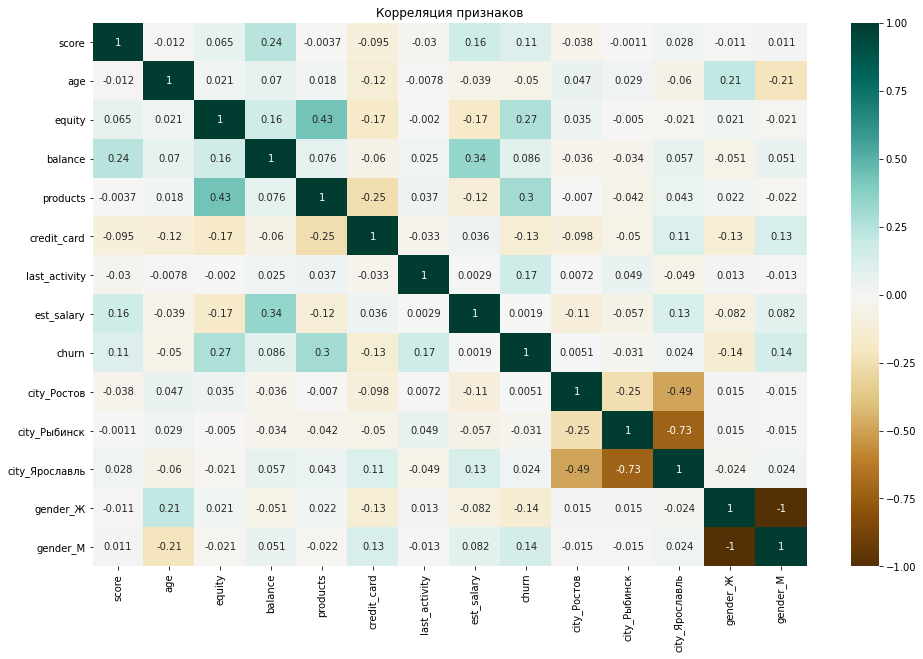

In [48]:
plt.figure(figsize=(16, 10)) 
heatmap = sns.heatmap(data_corr.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG') 
plt.title('Корреляция признаков');

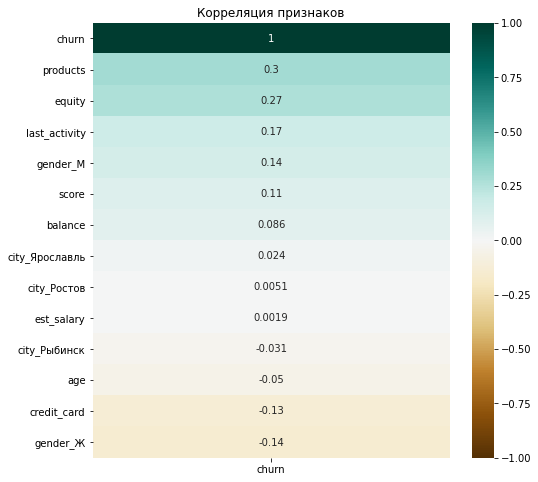

In [50]:
plt.figure(figsize=(8, 8)) 
heatmap = sns.heatmap(data_corr.corr()[['churn']].sort_values(by = 'churn', ascending = False), vmin=-1, vmax=1, annot=True, cmap='BrBG') 
plt.title('Корреляция признаков');

Высокие показатели корреляции в матрице отсутствуют. 

Однако есть более выделяющиеся на общем фоне показатели корреляции, в соответствии со шкалой Чеддока:
* Слабая корреляция:
    - между оттоком и количеством продуктов (0,3),
    - между балансом и заработной платой (0,34),
    - между количеством продуктов и оценкой собственности (0,43),
* Очень слабая корреляция:
    - между оттоком и оценкой собственности (0,27),
    - между количеством продуктов и наличием кредитной карты (-0,25)

## Проверка статистических гипотез

Для проверки статестических гипотез используем т-тест Стьюдента.

Значение уровня критической занчимости используем = 0,05

*Нулевая гипотеза (Н0):* Средний возраст клиентов, которые пользуются двумя продуктами банка, равен среднему возрасту клиентов, которые пользуются одним продуктом.

*Альтернативная гипотеза (Н1):* Средний возраст клиентов, которые пользуются двумя продуктами банка, и средний возраст клиентов, которые пользуются одним продуктом, не равны.


In [51]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(data[data['products'] == 1]['age'], data[data['products'] == 2]['age'], equal_var = False)
# alpha = значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.03299080704232691
Отвергаем нулевую гипотезу


*Нулевая гипотеза (Н0):* Средняя оценка скоринга клиентов, которые пользуются двумя продуктами банка, равна средней оценке скоринга клиентов, которые пользуются одним продуктом.

*Альтернативная гипотеза (Н1):* Средняя оценка скоринга клиентов, которые пользуются двумя продуктами банка, и Средняя оценка скоринга клиентов, которые пользуются одним продуктом, не равны.

In [52]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(data[data['products'] == 1]['score'], data[data['equity'] == 2]['score'], equal_var = False)
# alpha = значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

2.1817309600293333e-47
Отвергаем нулевую гипотезу


*Нулевая гипотеза (Н0):* Средний возраст отточных клиентов равен среднему возрасту активных клиентов.

*Альтернативная гипотеза (Н1):* Средний возраст отточных клиентов и средний возраст активных клиентов не равны.

In [53]:
display(len(data[data['churn']==1]['age']))
len(data[data['churn']==0]['age'])

1818

8155

In [54]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(data[data['churn']==1]['age'], data[data['churn']==0]['age'], equal_var = False)
# alpha = значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

7.536127357312234e-08
Отвергаем нулевую гипотезу


    
<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера:</b> Проверка проведена
</div>


## Промежуточный итог

- Определить наиболее важные критерии клиентов;
- Выявить признаки клиентов, оказывающие наибольшее вляние на отток.

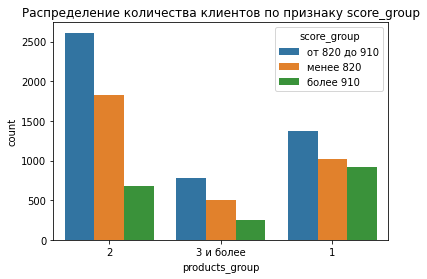

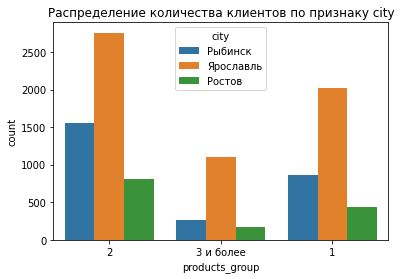

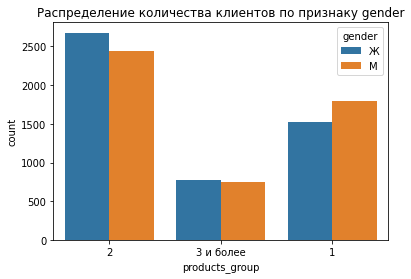

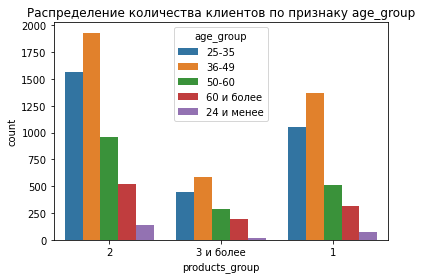

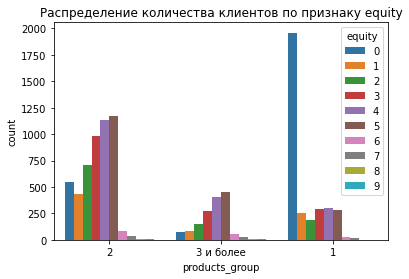

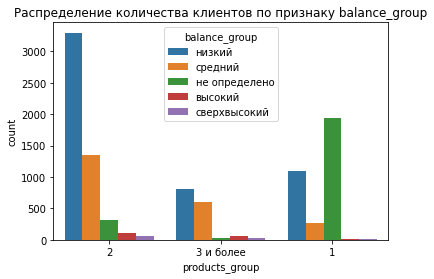

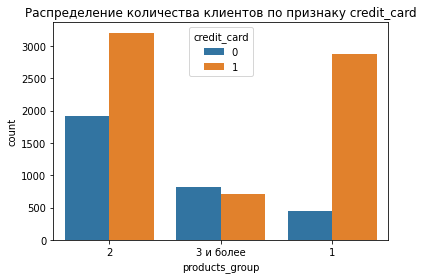

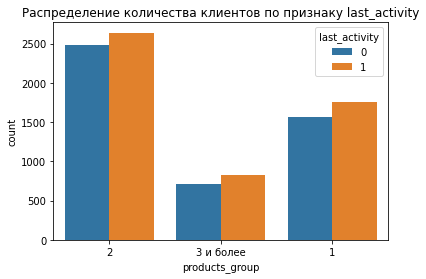

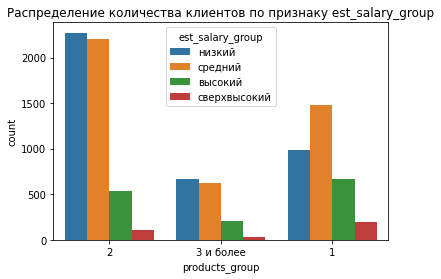

In [55]:
for i in ['score_group', 'city', 'gender', 'age_group', 'equity', 'balance_group', 'credit_card', 'last_activity', 'est_salary_group']:
    sns.countplot(data=data, x='products_group', hue=i);
    plt.title(f'Распределение количества клиентов по признаку {i}')
    plt.show()

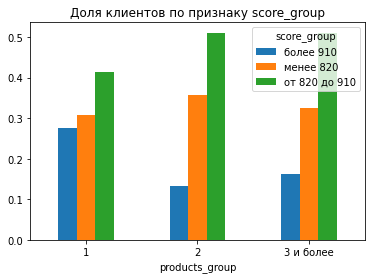

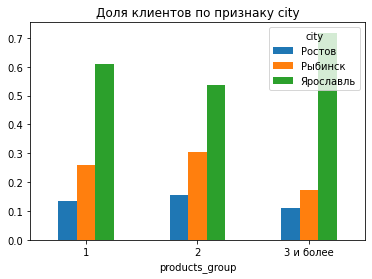

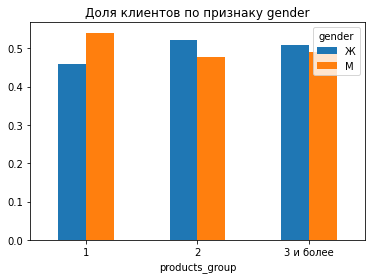

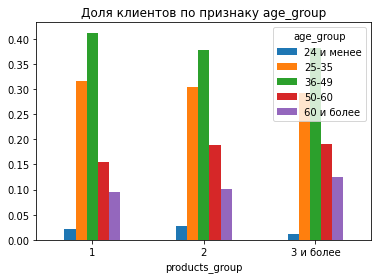

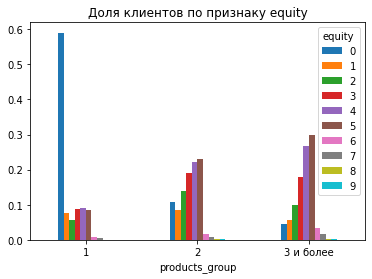

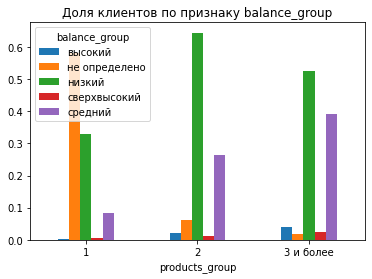

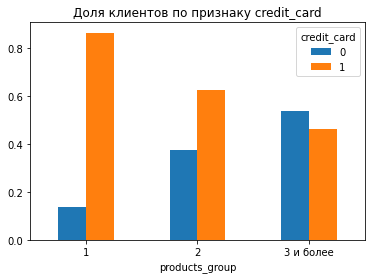

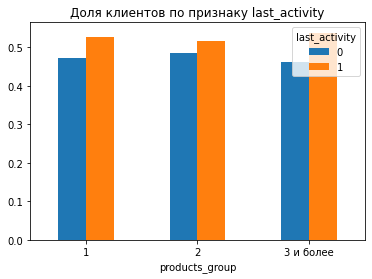

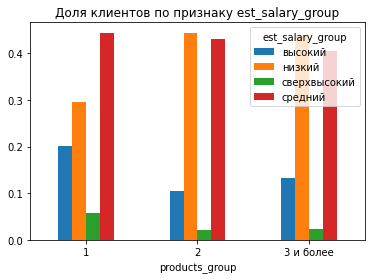

In [56]:
for i in ['score_group', 'city', 'gender', 'age_group', 'equity', 'balance_group', 'credit_card', 'last_activity', 'est_salary_group']:
    data_i = pd.crosstab(index = data['products_group'], columns = data[i], normalize = 'index')
    data_i.plot.bar(rot = 0);
    plt.title(f'Доля клиентов по признаку {i}')
    #plt.legend(['активные', 'отточные'])
    plt.show()    

In [57]:
data_products = data.groupby('products_group').agg({'user_id':'count', 'churn':'sum'}).reset_index()
data_products['persent'] = round(data_products['churn']/data_products['user_id']*100, 1)
data_products

,products_group,user_id,churn,persent
0,1,3323,235,7.1
1,2,5119,978,19.1
2,3 и более,1531,605,39.5


Посмотрим какие клиенты количественно преобладают в группах по количеству продуктов:

* 1 продукт - уровень оттока 7%, наиболее преобладают клиенты из Ярославля, чаще мужчины, преобладают клиенты в возрастной группе 36-49 лет и 25-35 лет, оценка собственности 0, чаще всего у клентов этой группы отсутствуют данные о балансе (можно предположить , что у них отсутствует положительный баланс), сильно преобладают клиенты с кредитной картой, большинство имеет средний уровень заработной платы

* 2 продукта - уровень оттока 19%, большинство клиентов из Ярославля, чаще женщины, преобладающая возрастная группа 36-49 лет и 25-35 лет, большинство клиентов имеют среднюю оценку собственности 3-5, чаще пользуются кредитными картами, преобладают клиенты с низким и средним уровнем заработной платы.

* 3 и более продукта - уровень оттока 39,5%, портрет клиентов и 3-мя и более продуктами очень похож на клиентов использующих 2 продукта - большинство клиентов также из Ярославля, также преобладает возрастная группа 36-49 и 25-35 лет, большинство клиентов имеют среднюю оценку собственности 3-5, преобладают клиенты с низким и средним уровнем заработной платы, однако данные клиенты гораздо реже используют кредитные карты.

## Сегментация пользователей

- Рассмотрим пользователей на основе данных о количестве потребляемых продуктов с учетом доли оттока

In [58]:
for i in ['score_group', 'city', 'gender', 'age_group', 'equity', 'balance_group', 'credit_card', 'last_activity', 'est_salary_group']:
    data_products = data.groupby(['products_group', i]).agg({'user_id':'count', 'churn':'sum'}).reset_index()
    data_products['persent'] = round(data_products['churn']/data_products['user_id']*100, 1)
    display(data_products.sort_values(by = 'persent', ascending = False))

,products_group,score_group,user_id,churn,persent
6,3 и более,более 910,250,143,57.2
8,3 и более,от 820 до 910,782,329,42.1
7,3 и более,менее 820,499,133,26.7
5,2,от 820 до 910,2611,675,25.9
3,2,более 910,682,138,20.2
2,1,от 820 до 910,1377,140,10.2
4,2,менее 820,1826,165,9.0
1,1,менее 820,1026,62,6.0
0,1,более 910,920,33,3.6


,products_group,city,user_id,churn,persent
8,3 и более,Ярославль,1099,441,40.1
6,3 и более,Ростов,167,64,38.3
7,3 и более,Рыбинск,265,100,37.7
5,2,Ярославль,2754,546,19.8
3,2,Ростов,805,152,18.9
4,2,Рыбинск,1560,280,17.9
0,1,Ростов,444,49,11.0
1,1,Рыбинск,857,56,6.5
2,1,Ярославль,2022,130,6.4


,products_group,gender,user_id,churn,persent
5,3 и более,М,752,376,50.0
4,3 и более,Ж,779,229,29.4
3,2,М,2443,636,26.0
2,2,Ж,2676,342,12.8
1,1,М,1796,171,9.5
0,1,Ж,1527,64,4.2


,products_group,age_group,user_id,churn,persent
13,3 и более,50-60,292,154,52.7
11,3 и более,25-35,446,195,43.7
12,3 и более,36-49,583,221,37.9
8,2,50-60,963,261,27.1
6,2,25-35,1561,383,24.5
10,3 и более,24 и менее,18,4,22.2
5,2,24 и менее,143,23,16.1
14,3 и более,60 и более,192,31,16.1
7,2,36-49,1930,289,15.0
3,1,50-60,513,53,10.3


,products_group,equity,user_id,churn,persent
9,1,9,1,1,100.0
28,3 и более,8,4,3,75.0
27,3 и более,7,26,15,57.7
26,3 и более,6,54,28,51.9
29,3 и более,9,4,2,50.0
19,2,9,8,4,50.0
25,3 и более,5,456,217,47.6
17,2,7,38,17,44.7
24,3 и более,4,408,161,39.5
23,3 и более,3,272,96,35.3


,products_group,balance_group,user_id,churn,persent
10,3 и более,высокий,63,44,69.8
14,3 и более,средний,599,313,52.3
5,2,высокий,102,49,48.0
13,3 и более,сверхвысокий,37,14,37.8
3,1,сверхвысокий,15,5,33.3
8,2,сверхвысокий,59,19,32.2
9,2,средний,1348,395,29.3
12,3 и более,низкий,803,231,28.8
4,1,средний,273,49,17.9
2,1,низкий,1090,173,15.9


,products_group,credit_card,user_id,churn,persent
5,3 и более,1,711,340,47.8
4,3 и более,0,820,265,32.3
2,2,0,1916,527,27.5
3,2,1,3203,451,14.1
1,1,1,2870,212,7.4
0,1,0,453,23,5.1


,products_group,last_activity,user_id,churn,persent
5,3 и более,1,823,391,47.5
4,3 и более,0,708,214,30.2
3,2,1,2639,731,27.7
2,2,0,2480,247,10.0
1,1,1,1753,155,8.8
0,1,0,1570,80,5.1


,products_group,est_salary_group,user_id,churn,persent
8,3 и более,высокий,203,111,54.7
10,3 и более,сверхвысокий,35,18,51.4
11,3 и более,средний,621,282,45.4
9,3 и более,низкий,672,194,28.9
4,2,высокий,536,133,24.8
7,2,средний,2206,493,22.3
6,2,сверхвысокий,106,23,21.7
5,2,низкий,2271,329,14.5
1,1,низкий,981,101,10.3
3,1,средний,1476,101,6.8


На основании числовых показателей можно сделать следующие выводы: 
- Наибольший уровень оттока наблюдается среди клиентов обслуживающихся в Ярославле, 
- уровень оттока у мужчин больше чем у женщин, 
- Наиболее отточные возрастные групы в диапазоне от 25 до 60 лет

- С учетом проведенного исследования выделим сегменты и рассчитаем количественные пораметры - размер сегмента, доля оттока.

Сегмент 1: пользователи имеющие 1 продукт и кредитную карту

In [59]:
data_1 = data.query('products_group == "1" and credit_card == 1')
print(f'Размер сегмента 1 = {len(data_1)} клиентов')
print(f'Доля оттока в сегменте 1 = {round(data_1["churn"].mean()*100, 1)}%')

Размер сегмента 1 = 2870 клиентов
Доля оттока в сегменте 1 = 7.4%


Сегмент 2: пользователи имеющие 2 продукта, проживающие в Ярославле в возрасте от 25 до 60 лет

In [60]:
data_2 = data.query('products_group == "2" and city == "Ярославль" and age>=25 and age<=60')
print(f'Размер сегмента 2 = {len(data_2)} клиентов')
print(f'Доля оттока в сегменте 2 = {round(data_2["churn"].mean()*100, 1)}%')

Размер сегмента 2 = 2437 клиентов
Доля оттока в сегменте 2 = 21.5%


Сегмент 2.1: пользователи имеющие 2 продукта, проживающие в Ростове и Рыбинске в возрасте от 25 до 60 лет

In [61]:
data_2_new = data.query('products_group == "2" and city != "Ярославль" and age>=25 and age<=60')
print(f'Размер сегмента 2.1 = {len(data_2_new)} клиентов')
print(f'Доля оттока в сегменте 2.1 = {round(data_2_new["churn"].mean()*100, 1)}%')

Размер сегмента 2.1 = 2017 клиентов
Доля оттока в сегменте 2.1 = 20.3%


Сегмент 3: пользователи имеющие 3 и более продуктов в возрасте от 25 до 60 лет

In [62]:
data_3 = data.query('products_group == "3 и более" and age>=25 and age<=60')
print(f'Размер сегмента3= {len(data_3)} клиентов')
print(f'Доля оттока в сегменте 3 = {round(data_3["churn"].mean()*100, 1)}%')

Размер сегмента3= 1321 клиентов
Доля оттока в сегменте 3 = 43.1%


In [63]:
print(f'Охват пользователей сегментацией - {round((len(data_1)+len(data_2)+len(data_2_new)+len(data_3))/len(data)*100, 2)}%')

Охват пользователей сегментацией - 86.68%


Для сравнения данных по городам посмотрим распределение клиентов в городах по различным параметрам для группы клиентов использующих 2 продукта

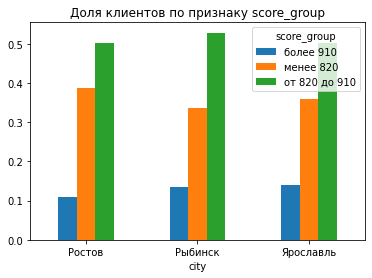

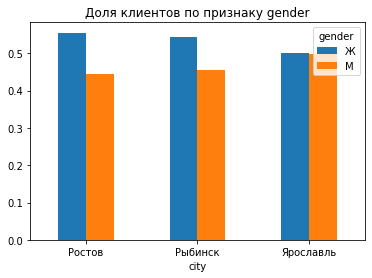

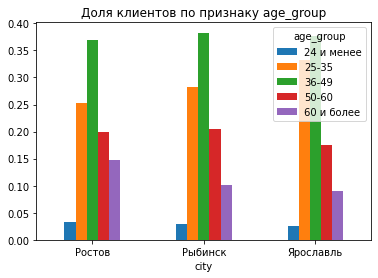

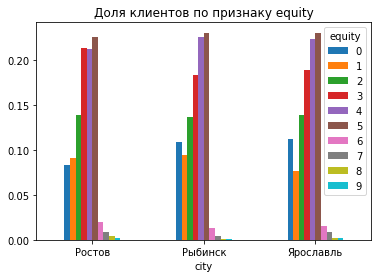

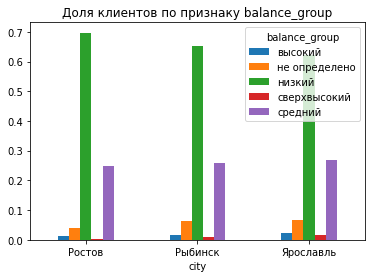

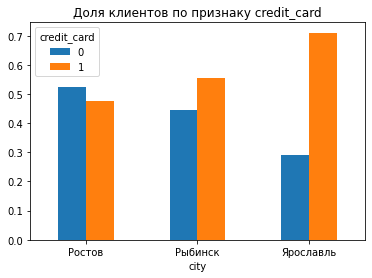

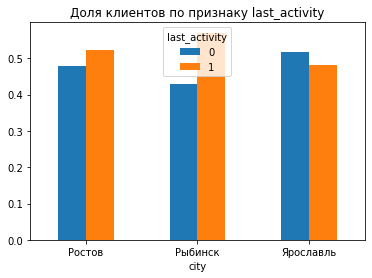

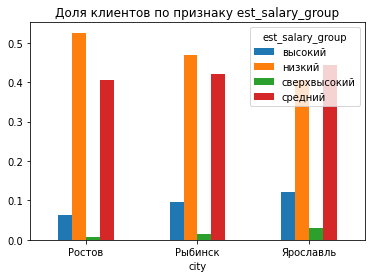

In [64]:
for i in ['score_group', 'gender', 'age_group', 'equity', 'balance_group', 'credit_card', 'last_activity', 'est_salary_group']:
    data_i = pd.crosstab(index = data.query('products_group == "2"')['city'], columns = data.query('products_group == "2"')[i], normalize = 'index')
    data_i.plot.bar(rot = 0);
    plt.title(f'Доля клиентов по признаку {i}')
    plt.show()    

По графикам относительных значений количества клиентов наблюдается разница только в части нескольких показателей.
В Ярославле:
- почти поровну мужчин и женщин
- чаще встречаются клиенты из более молодой возрастной группы 25-35 лет, чем в области
- больше клиентов с кредитными картами, чем в области.
    
Для 70% клиентов из Ярославля вторым продуктом является кредитная карта.


Проверим доли оттока по каждому признаку с учетом деления по городам для клиентов использующих 2 продукта

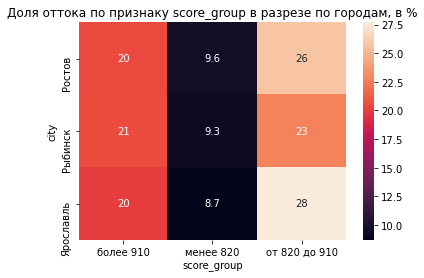

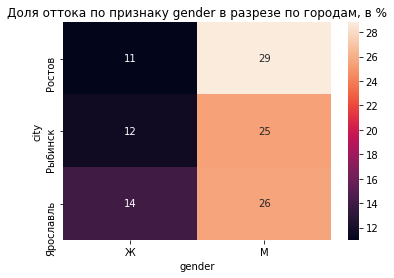

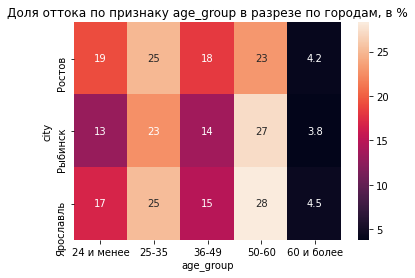

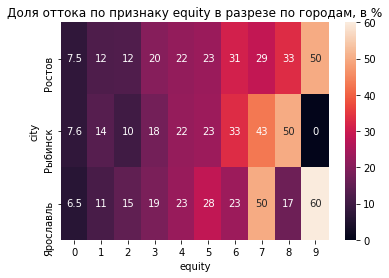

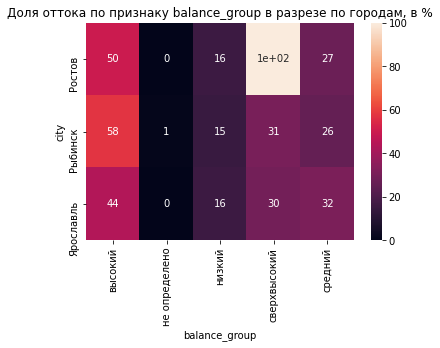

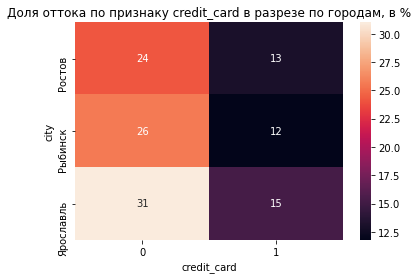

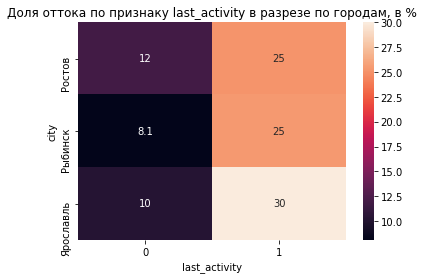

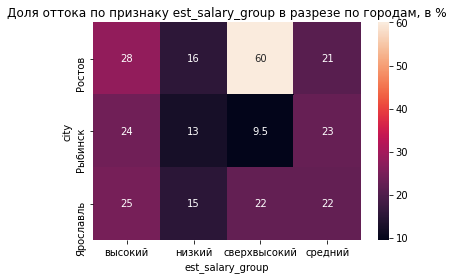

In [65]:
for i in ['score_group', 'gender', 'age_group', 'equity', 'balance_group', 'credit_card', 'last_activity', 'est_salary_group']:
    sns.heatmap(round(data.query('products_group == "2"').pivot_table(index = 'city', columns = i, values = 'churn', aggfunc = 'mean')*100, 1), annot=True)
    plt.title(f'Доля оттока по признаку {i} в разрезе по городам, в %')
    plt.show();

Сильных отличий в доле оттока не наблюдается, по параметрам баланс в группе высокий и заработная плата в группе сверхвысокий отличия есть, но это может быть из-за малого количества таких клиентов. Так же заметна разница доли оттока пользователей с кредитными картами и без, в Ярославле отток таких клиентов на 5-7% больше.

## Выводы и рекомендации

В ходе исследования выявлены следующие особености:

- Портрет среднестатистического клиента банка:
  - Половина клиентов проживают в Ярославле
  - больше всего клиентов в возрасте от 30 до 45 лет и от 45 до 60 лет
  - больше всего клиентов с оценкой собственности 0, клиентов с оценкой 4-5 тоже много
  - больше всего клиентов с зарплатой до 250000
  - большинство используют 1 или 2 продукта

- Наиболее отточные клиенты обладают следующими параметрами:
  - наиболее отточные клиенты имеют оценку скоринга в диапазоне от 820 до 910
  - можно выделить 2 возрастные группы более отточных клиентов - от 25 до 35 лет и от 50 до 60 лет
  - чаще всего уходят клиенты с балансом более 800000 и заработной платой выше 100000
  - доля отточных клиентов в разрезе городом мало отичается
  - чаще отточные клиенты - мужчины
  - доля оттока выше среди клиентов не имеющих кредитную карту
  - отточных клиентов больше в группе проявляющих активные действия.

- Клиенты использующих 1, 2, 3 и более продуктов обладают следующими параметрами:

  * 1 продукт - уровень оттока 7%, наиболее преобладают клиенты из Ярославля, чаще мужчины, преобладают клиенты в возрастной группе 36-49 лет и 25-35 лет, оценка собственности 0, чаще всего у клентов этой группы отсутствуют данные о балансе (можно предположить , что у них отсутствует положительный баланс), сильно преобладают клиенты с кредитной картой, большинство имеет средний уровень заработной платы

  * 2 продукта - уровень оттока 19%, большинство клиентов из Ярославля, чаще женщины, преобладающая возрастная группа 36-49 лет и 25-35 лет, большинство клиентов имеют среднюю оценку собственности 3-5, чаще пользуются кредитными картами, преобладают клиенты с низким и средним уровнем заработной платы.

  * 3 и более продукта - уровень оттока 39,5%, портрет клиентов и 3-мя и более продуктами очень похож на клиентов использующих 2 продукта - большинство клиентов также из Ярославля, также преобладает возрастная группа 36-49 и 25-35 лет, большинство клиентов имеют среднюю оценку собственности 3-5, преобладают клиенты с низким и средним уровнем заработной платы, однако данные клиенты гораздо реже используют кредитные карты.
  
В ходе исследования проверено 3 гипотезы из которых делаем следующие выводы:
  - не подтвердилось равентсво среднего возраста клиентов, которые пользуются двумя продуктами банка, и клиентов, которые пользуются одним продуктом.
  - не подтвердилось равентсво средней оценки скоринга клиентов, которые пользуются двумя продуктами банка, и клиентов, которые пользуются одним продуктом.
  - не подтвердилось равентсво среднего возраста отточных и активных клиентов.

Выделяем 4 сегмента: 

Сегмент 3: пользователи имеющие 3 и более продуктов в возрасте от 25 до 60 лет
Размер сегмента3= 1321 клиентов
Доля оттока в сегменте 3 = 43.1%

Сегмент 2: пользователи имеющие 2 продукта, проживающие в Ярославле в возрасте от 25 до 60 лет
Размер сегмента 2 = 2437 клиентов
Доля оттока в сегменте 2 = 21.5%

Сегмент 2.1: пользователи имеющие 2 продукта, проживающие в Ростове и Рыбинске в возрасте от 25 до 60 лет 
Размер сегмента 2.1 = 2017 клиентов
Доля оттока в сегменте 2.1 = 20.3%

Сегмент 1: пользователи имеющие 1 продукт и кредитную карту
Размер сегмента 1 = 2870 клиентов
Доля оттока в сегменте 1 = 7.4%

**Рекомендации**

Сегмент 3 - пользователи имеющие 3 и более продуктов имеют самый высокий уровень оттока, им необходимо уделить пристальное внимание, возможно разработать или обновить программу лояльности, поскольку в бОльшей степени мы теряем более обеспеченных клиентов необходимо повысить их лояльность.

Сегмент 2, Сегмент 2.1 - здесь выделены клиенты из Ярославля (сегмент 2) и областных городов Ростов и Рыбинск (сегмент 2.1) трудоспособного возраста, для удержания данных клиентов можно обновить условия зарплатных проектов, проработать корпоративное обслуживание для подключения новых зарплатных проектов с учетом региональных особенностей населения. 
    
Дополнительно: В Ярославле для около 70% клиентов вторым продуктом является кредитная карта, в связи с этим для сегмента 2 необходимо повысить интерес к другим продуктам банка, чтобы заинтересовать клиентов а также повысить лояльность текущих клиентов, например помимо зарплатных проектов проработать систему кэшбека или бонусов за оплату дебетовыми картами, подарок при открытиии вклада, начисление % на остаток по дебетовому счету. 

Сегмент 1 - клиенты имеющие 1 продукт - кредитную карту, сегмент имеет низкий уровень оттока, однако этот сегмент клиентов не перспективен для банка в плане развития, необходимо проработать дополнительные предложения (вклады, дебетовые счета, рефинансирование) и постараться привести данный сегмент к 2м и более продуктам.

